In [6]:
from matplotlib import pylab
from pylab import *
pylab.ion()
import GPy

f_output1 = lambda x: 4. * np.cos(x/5.) - .4*x - 35. + np.random.rand(x.size)[:,None] * 6.
f_output2 = lambda x: 6. * np.cos(x/5.) + .2*x + 35. + np.random.rand(x.size)[:,None] * 8.


#{X,Y} training set for each output
X1 = np.random.rand(100)[:,None]; X1=X1*75
X2 = np.random.rand(100)[:,None]; X2=X2*70 + 30
Y1 = f_output1(X1)
Y2 = f_output2(X2)
#{X,Y} test set for each output
Xt1 = np.random.rand(100)[:,None]*100
Xt2 = np.random.rand(100)[:,None]*100
Yt1 = f_output1(Xt1)
Yt2 = f_output2(Xt2)

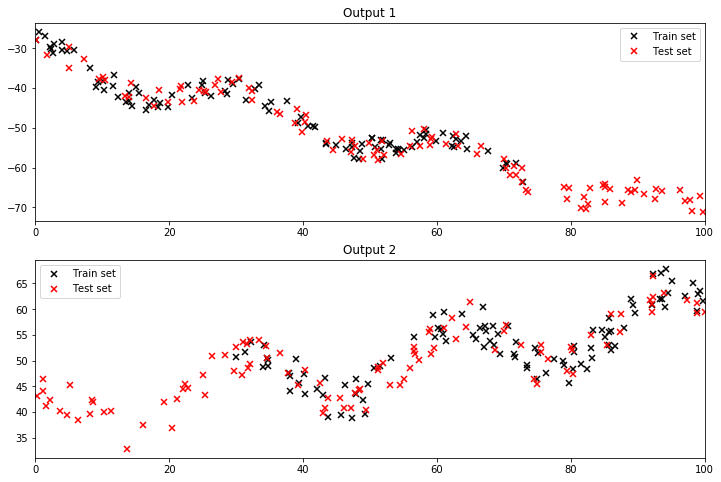

In [7]:
xlim = (0,100); ylim = (0,50)
fig = pb.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
ax1.set_xlim(xlim)
ax1.set_title('Output 1')
ax1.plot(X1[:,:1],Y1,'kx',mew=1.5,label='Train set')
ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5,label='Test set')
ax1.legend()
ax2 = fig.add_subplot(212)
ax2.set_xlim(xlim)
ax2.set_title('Output 2')
ax2.plot(X2[:,:1],Y2,'kx',mew=1.5,label='Train set')
ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5,label='Test set')
ax2.legend()

In [8]:
def plot_2outputs(m,xlim,ylim):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,100),ax=ax1)
    ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5)
    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(100,200),ax=ax2)
    ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5)

In [12]:
import GPy
k = GPy.kern.RBF(1)
B = GPy.kern.Coregionalize(input_dim = 1, output_dim= 2)
multkernel = k.prod(B,name = 'B.k')
print(multkernel)

  B_k.             |   value  |  constraints  |  priors
  rbf.variance     |     1.0  |      +ve      |        
  rbf.lengthscale  |     1.0  |      +ve      |        
  coregion.W       |  (2, 1)  |               |        
  coregion.kappa   |    (2,)  |      +ve      |        


In [13]:
print(B)

  coregion.  |   value  |  constraints  |  priors
  W          |  (2, 1)  |               |        
  kappa      |    (2,)  |      +ve      |        


In [14]:
B.W

index,coregion.W,constraints,priors
[0 0],-0.20735226,,
[1 0],-0.57293829,,


In [15]:
icm = GPy.util.multioutput.ICM(input_dim=1,num_outputs=2,kernel=GPy.kern.RBF(1))
print(icm)

  ICM.             |   value  |  constraints  |  priors
  rbf.variance     |     1.0  |      +ve      |        
  rbf.lengthscale  |     1.0  |      +ve      |        
  B.W              |  (2, 1)  |               |        
  B.kappa          |    (2,)  |      +ve      |        


In [17]:
K = GPy.kern.Matern32(1)
icm =GPy.util.multioutput.ICM(input_dim=1,num_outputs=2,kernel=K)
m = GPy.models.GPCoregionalizedRegression([X1,X2],[Y1,Y2],kernel=icm)


Name : gp
Objective : 468.0895990731332
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  gp.                                    |              value  |  constraints  |  priors
  ICM.Mat32.variance                     |  36.00242815105449  |      +ve      |        
  ICM.Mat32.lengthscale                  |  161.8522533946637  |      +ve      |        
  ICM.B.W                                |             (2, 1)  |               |        
  ICM.B.kappa                            |               (2,)  |      +ve      |        
  mixed_noise.Gaussian_noise_0.variance  |  2.661982806982769  |      +ve      |        
  mixed_noise.Gaussian_noise_1.variance  |  5.487704224499621  |      +ve      |        


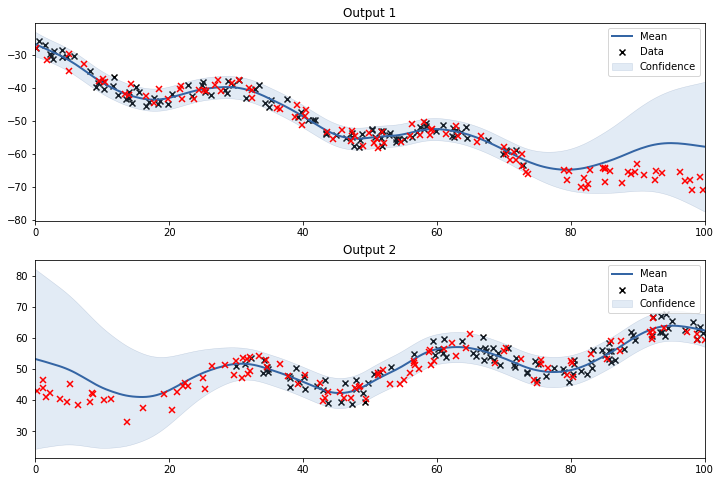

In [18]:
m.optimize()
print(m)
plot_2outputs(m,xlim=(0,100),ylim=(-20,60))

Text(0.5, 1.0, 'Output 2')

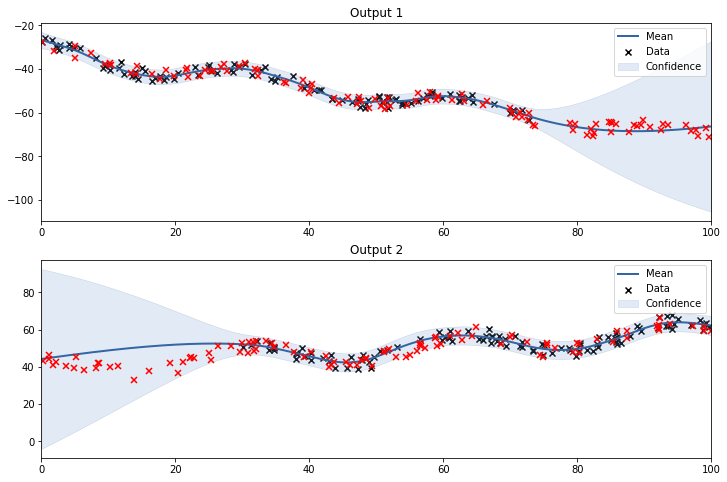

In [19]:
K = GPy.kern.Matern32(1)

m1 = GPy.models.GPRegression(X1,Y1,kernel=K.copy())
m1.optimize()
m2 = GPy.models.GPRegression(X2,Y2,kernel=K.copy())
m2.optimize()
fig = pb.figure(figsize=(12,8))
#Output 1
ax1 = fig.add_subplot(211)
m1.plot(plot_limits=xlim,ax=ax1)
ax1.plot(Xt1[:,:1],Yt1,'rx',mew=1.5)
ax1.set_title('Output 1')
#Output 2
ax2 = fig.add_subplot(212)
m2.plot(plot_limits=xlim,ax=ax2)
ax2.plot(Xt2[:,:1],Yt2,'rx',mew=1.5)
ax2.set_title('Output 2')

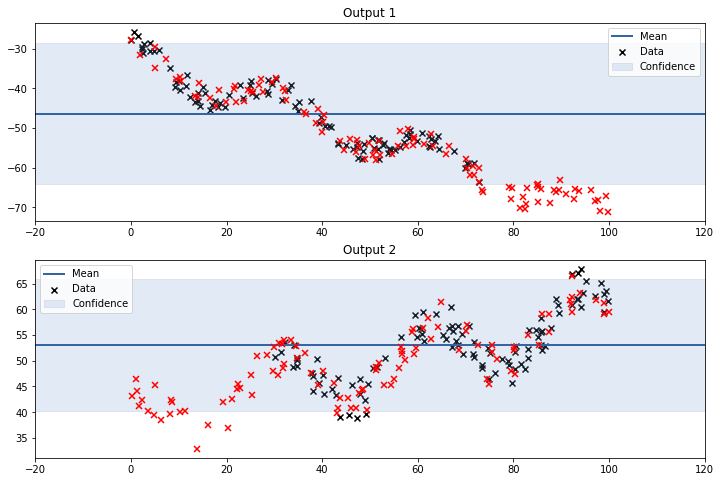

In [20]:
kernel = GPy.util.multioutput.ICM(input_dim=1,num_outputs=2,kernel=GPy.kern.Bias(input_dim=1))
m = GPy.models.GPCoregionalizedRegression([X1,X2],[Y1,Y2],kernel)
m.optimize()
plot_2outputs(m,xlim=(-20,120),ylim=(0,60))

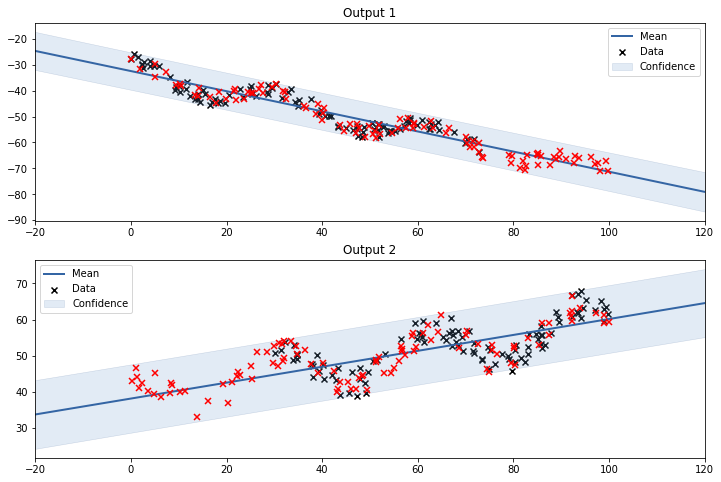

In [21]:
K1 = GPy.kern.Bias(1)
K2 = GPy.kern.Linear(1)
lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K2])
m=GPy.models.GPCoregionalizedRegression([X1,X2],[Y1,Y2],kernel=lcm)
m.optimize()
plot_2outputs(m,xlim=(-20,120),ylim=(0,60))

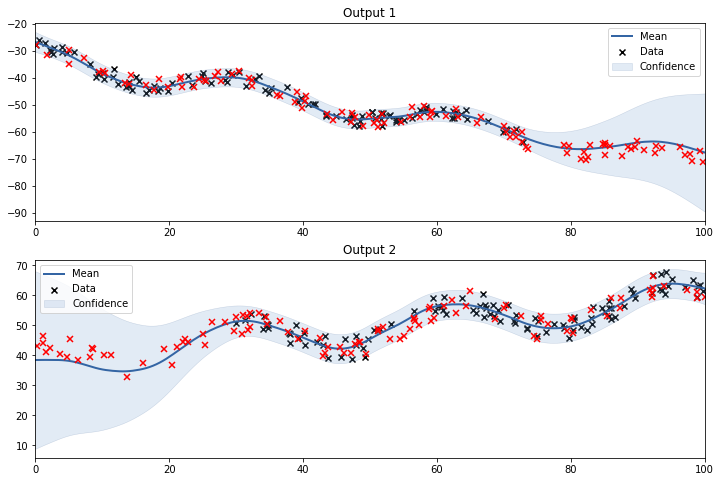

In [22]:
K1 = GPy.kern.Bias(1)
K2 = GPy.kern.Linear(1)
K3 = GPy.kern.Matern32(1)
lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K2,K3])

m = GPy.models.GPCoregionalizedRegression([X1,X2],[Y1,Y2],kernel=lcm)
m['.*ICM.*var'].unconstrain()
m['.*ICM0.*var'].constrain_fixed(1.)
m['.*ICM0.*W'].constrain_fixed(0)
m['.*ICM1.*var'].constrain_fixed(1.)
m['.*ICM1.*W'].constrain_fixed(0)
m.optimize()
plot_2outputs(m,xlim=(0,100),ylim=(-20,60))

In [35]:
newX = np.arange(70,80)[:,None]
newX = np.hstack([newX,np.ones_like(newX)])
print(newX)

[[70  1]
 [71  1]
 [72  1]
 [73  1]
 [74  1]
 [75  1]
 [76  1]
 [77  1]
 [78  1]
 [79  1]]


In [36]:
noise_dict = {'output_index':newX[:,1:].astype(int)}
m.predict(newX,Y_metadata=noise_dict)

(array([[53.47126117],
        [52.61094567],
        [51.70051737],
        [50.82786067],
        [50.11195984],
        [49.57829143],
        [49.21917457],
        [49.04895282],
        [49.05868152],
        [49.24427164]]), array([[5.98811212],
        [6.02218335],
        [6.0453137 ],
        [6.06408035],
        [6.08071693],
        [6.10859588],
        [6.14951805],
        [6.16556227],
        [6.134668  ],
        [6.07389526]]))